In [1]:
import numpy as np
from utils import CNOT, Cphase, QFT, QFTMatrix, inverseQFT, swap, kronString, binaryToState, stateToBinary, H, reverseOrder

##

## Testing some of the functions to see if they are doing what they are supposed to do

In [2]:
# Testing CNOT gate and printing out gate as String
# 1. CNOT0,1=|0⟩⟨0|⊗I+|1⟩⟨1|⊗X for 2 qubits
CNOT(0,1,2, printString = True)

# 2. CNOT1,3=I⊗|0⟩⟨0|⊗I⊗I+I⊗|1⟩⟨1|⊗I⊗X for 4 qubits
CNOT(1,3,4,printString = True)

PI QX
IPII IQIX


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.

In [3]:
# testing state to binary and binary to state functions
n = 3
input = np.array([0.2+1j, 0, 1, 0, 0.5, 0, 0, 5])
binary = stateToBinary(input, n)
state = binaryToState(binary,n)
print(f"Initial state: {input}")
print(f"Binary representation: {binary}")
print(f"Transformed back to state: {state}")

Initial state: [0.2+1.j 0. +0.j 1. +0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 5. +0.j]
Binary representation: [('000', (0.2+1j)), ('010', (1+0j)), ('100', (0.5+0j)), ('111', (5+0j))]
Transformed back to state: [0.2+1.j 0. +0.j 1. +0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 5. +0.j]


In [4]:
# Testing Swap operations

nList = [3,4,5,6,8]
initialStates = [np.zeros(2**i) for i in nList]
for n, state in zip(nList,initialStates):
    state[np.random.randint(len(state))] = 1
    print(f"Initial state {state}")
    print(f"Initial state as binary: {stateToBinary(state,n)}")
    reversed = reverseOrder(state,n)
    #print(f"states with reversed order: {reversed}")
    print(f"reversed as binary: {stateToBinary(reversed,n)}")
    print("#####################")

Initial state [0. 0. 0. 0. 0. 0. 1. 0.]
Initial state as binary: [('110', 1.0)]
reversed as binary: [('011', (1+0j))]
#####################
Initial state [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Initial state as binary: [('0000', 1.0)]
reversed as binary: [('0000', (1+0j))]
#####################
Initial state [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Initial state as binary: [('01000', 1.0)]
reversed as binary: [('00010', (1+0j))]
#####################
Initial state [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Initial state as binary: [('011110', 1.0)]
reversed as binary: [('011110', (1+0j))]
#####################
Initial state [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

### Example of QFT  for two qubits on one state, you can compare it to Hundt 169 output and see it matches

In [5]:
from utils import QFTMatrix
qubits = 2
initialState = np.array([0,1,0,0])
state , operator = QFT(initialState,qubits)
Matrixstate, operatorMatrix = QFTMatrix(initialState,qubits)

print(f"Own QFT transformed state {state}")
print(f"Matrix QFT transformed state {Matrixstate}")
print("###########################")
print("operator")
"""print(2*np.round(operator,2))
print(np.matmul(operator, initialState))
print("OperatorMatrix")"""
print(2*np.round(operatorMatrix,2))




#print(np.round(operator,2).conj().T)


Apply hadamard to 0th qubit
Apply CPhase with power 1, IndexC 1, indexA 0
-0.5pi
Apply hadamard to 1th qubit
Own QFT transformed state [ 0.5+0.j   0. +0.5j -0.5+0.j  -0. -0.5j]
Matrix QFT transformed state [ 0.5+0.j   0. +0.5j -0.5+0.j  -0. -0.5j]
###########################
operator
[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j  0.-1.j]
 [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]
 [ 1.+0.j  0.-1.j -1.+0.j  0.+1.j]]


### same for 3 qubits

In [11]:
from utils import QFTMatrix
initialState = np.array([1,0,1,0,1,1,0,0])
qubits = 3
state , operator = QFT(initialState,qubits)
Matrixstate, operatorMatrix = QFTMatrix(initialState,qubits)


print(f"Own QFT transformed state\n {state}")
print(f"Matrix QFT transformed state \n{Matrixstate}")
"""print("###########################")
print("operator")
print(2*np.round(operator,2))
print(np.matmul(operator, initialState))
print("OperatorMatrix")"""
#print(2*np.round(operatorMatrix,2))

Apply hadamard to 0th qubit
Apply CPhase with power 1, IndexC 1, indexA 0
-0.5pi
Apply CPhase with power 2, IndexC 2, indexA 0
-0.25pi
Apply hadamard to 1th qubit
Apply CPhase with power 1, IndexC 2, indexA 1
-0.5pi
Apply hadamard to 2th qubit
Own QFT transformed state
 [ 1.4142+0.j     -0.25  +0.1036j  0.3536+0.3536j  0.25  -0.6036j
  0.7071+0.j      0.25  +0.6036j  0.3536-0.3536j -0.25  -0.1036j]
Matrix QFT transformed state 
[ 1.4142+0.j     -0.25  +0.1036j  0.3536+0.3536j  0.25  -0.6036j
  0.7071-0.j      0.25  +0.6036j  0.3536-0.3536j -0.25  -0.1036j]


'print("###########################")\nprint("operator")\nprint(2*np.round(operator,2))\nprint(np.matmul(operator, initialState))\nprint("OperatorMatrix")'

## Thorough Test
We can test it for multiple states per qubit number and use numpys allclose() function to compare to arrays, and see how well the two algorithms perform

In [7]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import QFT as qiskitQFT
from numpy.linalg import norm
import sys
import os

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout


nList = [2,3,4,5,10]
statesPerRun = 100

totalExperiments = statesPerRun
for n in nList:
    initialList = [np.random.rand(2**n) for _ in range(statesPerRun)]
    initialList = [state/norm(state) for state in initialList]
    #with HiddenPrints():
    ownQFTcounter = 0
    MatrixQFTcounter = 0
    for initialState in initialList:
        
        with HiddenPrints():
            print(initialState)
            # Use qiskit first
            qc = QuantumCircuit(n)
            qc.initialize(initialState, range(n))
            qft = qiskitQFT(n, do_swaps=True, inverse=False)
            qc.append(qft,range(n))
            backend = Aer.get_backend("statevector_simulator")
            job = execute(qc,backend)
            result = job.result()
            qiskitState = result.get_statevector(qc)
            # now own QFT algorithms
            stateMatrix, _ = QFTMatrix(initialState,n)
            state,_ = QFT(initialState,n)
            # compare to qiskit QFT
            threshold = 0.1
            print(stateMatrix, qiskitState, state)
        if np.allclose(stateMatrix,qiskitState, atol = threshold):
            MatrixQFTcounter +=1
        if np.allclose(state, qiskitState, atol = threshold):
            ownQFTcounter+=1
    print(f"For {n} qubits the own QFT code by scratch managed to predict {ownQFTcounter/totalExperiments*100} % and the Matrix QFT predicted {MatrixQFTcounter/totalExperiments*100} %")


C:\Users\Markus\AppData\Local\Temp\ipykernel_27836\2784396849.py:38: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend("statevector_simulator")
C:\Users\Markus\AppData\Local\Temp\ipykernel_27836\2784396849.py:39: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,backend)
C:\Users\Markus\AppData\Local\Temp\ipykernel_27836\2784396849.py:39: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, whi

For 2 qubits the own QFT code by scratch managed to predict 100.0 % and the Matrix QFT predicted 100.0 %
For 3 qubits the own QFT code by scratch managed to predict 100.0 % and the Matrix QFT predicted 100.0 %
For 4 qubits the own QFT code by scratch managed to predict 100.0 % and the Matrix QFT predicted 100.0 %
For 5 qubits the own QFT code by scratch managed to predict 100.0 % and the Matrix QFT predicted 100.0 %
For 10 qubits the own QFT code by scratch managed to predict 100.0 % and the Matrix QFT predicted 100.0 %


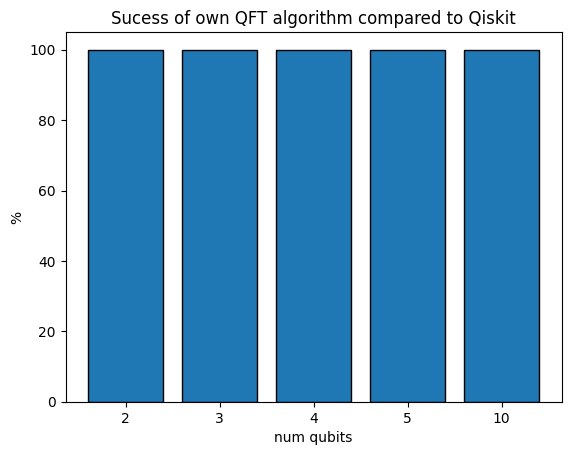

In [9]:
import matplotlib.pyplot as plt


words = ["2","3","4","5","10"]
numbers = [100,100,100,100,100]

plt.bar(words, numbers, edgecolor='black')


plt.title('Sucess of own QFT algorithm compared to Qiskit')
plt.xlabel('num qubits')
plt.ylabel('%')

# Show plot
plt.savefig("QFTresults.png")
plt.show()
